## Введение в анализ данных и машинное обучение на Python

### Тема 7: Линейная регрессия (7 декабря 2019)

---

__Часть 1: Подготовка данных__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Продолжаем работать с набором данных `Boston`.

In [16]:
from sklearn.datasets import load_boston # Импортировать набор данных
boston_data = load_boston() # Загрузить данные 

X = boston_data['data']
Y = boston_data['target']

X = pd.DataFrame(X) # Создание DataFrame на основе признаков

X.columns = boston_data['feature_names'] # Имена столбцов

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Разобьём данные на тренировочную и тестовую выборку:

__Задание 1:__ Импортируйте класс `train_test_split` из модуля `model_selection` библиотеки `sklearn`.

In [14]:
from sklearn.model_selection import train_test_split

__Задание 2:__ Разбейте выборку на тренировочную и тестовую. Доля наблюдений тестовой выборки должна равняться 0.3 Проверьте размеры выборок.

In [21]:
np.random.seed(123) # Важно!

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [29]:
X_train.shape

(354, 13)

In [30]:
Y_train.shape

(354,)

---

__Часть 3: Построение парной регрессии__

__Задание 1:__ Импортируйте класс `Linear Regression` из модуля `linear_model` библиотеки `sklearn`. 

In [31]:
from sklearn.linear_model import LinearRegression

__Задание 2:__ Обучите следующую модель парной регрессии:
$$
Y_i = \beta_0 + \beta_1LSTAT_i + u_i
$$

In [63]:
model = LinearRegression()

In [64]:
model.fit(np.array(X_train['LSTAT']).reshape(-1, 1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Задание 3:__ Получите коэффициенты модели. Постройте диаграмму рассеяния с нанесённой линией оценённой регрессии. Интерпретируйте результат.

In [65]:
model.intercept_

34.406684407598476

In [66]:
model.coef_

array([-0.94326736])

Text(0, 0.5, 'Y')

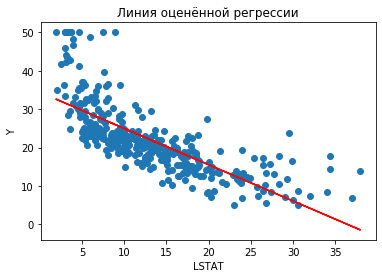

In [69]:
plt.scatter(X_train['LSTAT'], Y_train)
hatY = model.intercept_ + model.coef_[0] * X_train['LSTAT']
plt.plot(X_train['LSTAT'], hatY, c='r')
plt.title('Линия оценённой регрессии')
plt.xlabel('LSTAT')
plt.ylabel('Y')

__Задание 4:__ Сделайте предсказания для тестовой выборки. Рассчитайте MSE (`sklearn.metrics.mean_squared_error`). Рассчитайте $R^2$ (`sklearn.metrics.r2_score`). Сделайте вывод о предсказательной силе модели.

In [70]:
preds = model.predict(np.array(X_test['LSTAT']).reshape(-1, 1))

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error(Y_test, preds)

41.2212466495064

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(Y_test, preds)

0.5205256400626603

---

__Часть 4: Построение множественной регрессии__

__Задание 1:__ Обучите следующую модель:
$$
Y_i = X\beta + u,
$$
где $X = (1, LSTAT, AGE, RM)$.

Интерпретируйте результат. Сравните предсказательную силу этой модели с моделью из предыдущей части. 

In [75]:
model2 = LinearRegression()
model2.fit(X_train[['LSTAT', 'AGE', 'RM']], Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
model2.coef_

array([-0.70421652,  0.00751124,  4.29493737])

In [77]:
model2.intercept_

3.9637035934020055

In [79]:
preds2 = model2.predict(X_test[['LSTAT', 'AGE', 'RM']])

In [80]:
mean_squared_error(Y_test, preds2)

29.518660462715758

In [81]:
r2_score(Y_test, preds2)

0.6566469483101436